In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
from matplotlib import animation
import time
import pandas as pd
import multiprocessing
import itertools
from scipy.spatial import distance
np.set_printoptions(threshold=np.nan)
import os
import seaborn as sns
np.random.seed(5761)

# problems:

1. too many farms
2. What is ruminant animals in our data?
3. I only impute farm locations and holding numbers. What about other variables?

In [3]:
os.chdir('/Users/apple/Desktop/group/data');

In [4]:
Kenya_cattle_2006=pd.read_csv('crop_cattle_2006.txt', 
                       names = ["Long", "Lat", "Holding Number"], delim_whitespace=True)

In [5]:
Kenya_cattle_2006

,Long,Lat,Holding Number
0,35.820833,0.0375,144.021851
1,35.829167,0.0375,134.695374
2,35.837500,0.0375,113.206512
3,35.845833,0.0375,52.136353
4,35.854167,0.0375,55.617077
5,35.862500,0.0375,63.973484
6,35.870833,0.0375,60.376671
7,35.879167,0.0375,65.094673
8,35.887500,0.0375,66.047081
9,35.895833,0.0375,66.432419


In [6]:
Latitude=Kenya_cattle_2006["Lat"].values
Longtitude=Kenya_cattle_2006["Long"].values
Holding_number=Kenya_cattle_2006["Holding Number"].values

In [7]:
b=list(set(Latitude))
b.sort()
del b[0]
b1=list(set(Latitude))
b1.sort()
del b[-1]
dist_lat=[x - y for x, y in zip(b, b1)]

c=list(set(Longtitude))
c.sort()
del c[0]
c1=list(set(Longtitude))
c1.sort()
del c1[-1]
dist_long=[x - y for x, y in zip(c, c1)]

dlat=np.mean(dist_lat)
print(np.var(dist_lat))
dlong=np.mean(dist_long)
print(np.var(dist_long))
dlat_half=dlat/2
dlong_half=dlong/2

2.01796717346e-33
5.1841135542e-29


In [8]:
a=Holding_number.reshape((67,93))

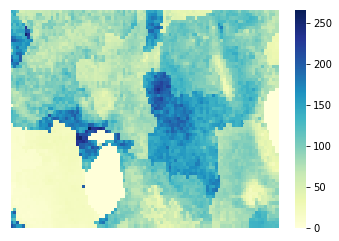

In [9]:
ax = sns.heatmap(a,cmap="YlGnBu",xticklabels=False,yticklabels=False)
plt.show()

In [10]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(0.02916667)
lon1 = radians(35.82083333)
lat2 = radians(0.0375)
lon2 = radians(35.82916667)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result:", distance,"km")

('Result:', 1.3108563064560774, 'km')


In [11]:
lat1 = radians(0.0375)
lon1 = radians(35.820833333333326)
lat2 = radians(0.0375)
lon2 = radians(35.829166666666666)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result:", distance,"km")

('Result:', 0.9269150783832069, 'km')


In [12]:
Kenya=pd.read_csv("completeData2.csv")

In [13]:
cattle=Kenya['cattle'].values

In [14]:
missing_farm_lat=list()
missing_farm_long=list()
missing_farm_hold=list()

In [15]:
for i in range(1):
    lat_i=Latitude[i]
    long_i=Longtitude[i]
    hold_i=round(Holding_number[i])
    
    
    lat_lower=lat_i-dlat_half
    lat_upper=lat_i+dlat_half
    long_lower=long_i-dlong_half
    long_upper=long_i+dlong_half
    while (True):
        impute_farm_lat=np.random.uniform(lat_lower,lat_upper)
        impute_farm_long=np.random.uniform(long_lower,long_upper)
        impute_farm_hold=np.random.choice(cattle)       
        
        if hold_i>impute_farm_hold:
            missing_farm_lat.append(impute_farm_lat)
            missing_farm_long.append(impute_farm_long)
            missing_farm_hold.append(impute_farm_hold)
        
            hold_i=hold_i-impute_farm_hold    
        else:
            missing_farm_lat.append(impute_farm_lat)
            missing_farm_long.append(impute_farm_long)
            missing_farm_hold.append(int(hold_i))
            break

In [16]:
missing_farm_hold

[8, 7, 2, 20, 13, 2, 56, 6, 0, 30]

In [17]:
missing_farm_lat=list()
missing_farm_long=list()
missing_farm_hold=list()

In [19]:
N=len(Latitude)

In [20]:
for i in range(N):
    lat_i=Latitude[i]
    long_i=Longtitude[i]
    hold_i=round(Holding_number[i])
    
    lat_lower=lat_i-dlat_half
    lat_upper=lat_i+dlat_half
    long_lower=long_i-dlong_half
    long_upper=long_i+dlong_half
    if (hold_i!=0):
        while (True):
            impute_farm_lat=np.random.uniform(lat_lower,lat_upper)
            impute_farm_long=np.random.uniform(long_lower,long_upper)
            impute_farm_hold=np.random.choice(cattle)       
            if hold_i>impute_farm_hold:
                missing_farm_lat.append(impute_farm_lat)
                missing_farm_long.append(impute_farm_long)
                missing_farm_hold.append(impute_farm_hold)
                hold_i=hold_i-impute_farm_hold    
            else:
                missing_farm_lat.append(impute_farm_lat)
                missing_farm_long.append(impute_farm_long)
                missing_farm_hold.append(int(hold_i))
                break
    

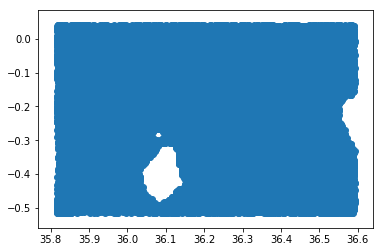

In [21]:
plt.scatter(missing_farm_long,missing_farm_lat)
plt.show()

In [22]:
latitude=Kenya["lat"].values
longtitude=Kenya["long"].values
cluster=Kenya["X__1"].values

In [23]:
cluster_unique=list(set(cluster))
N_cluster=len(cluster_unique)

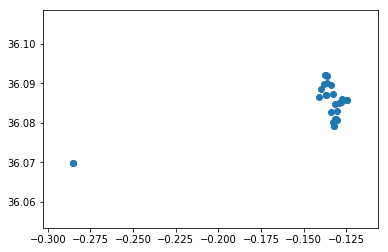

In [24]:
plt.scatter(latitude[cluster==cluster_unique[6]],longtitude[cluster==cluster_unique[6]])
plt.show()

In [25]:
index6=[i for i in range(len(cluster)) if cluster[i]==cluster_unique[6] and latitude[i]<-0.2]
cluster[index6]='NA'

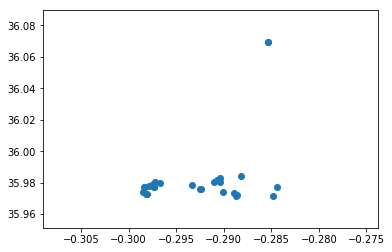

In [26]:
plt.scatter(latitude[cluster==cluster_unique[9]],longtitude[cluster==cluster_unique[9]])
plt.show()

In [27]:
index9=[i for i in range(len(cluster)) if cluster[i]==cluster_unique[9] and longtitude[i]>36.04]
cluster[index9]='NA'

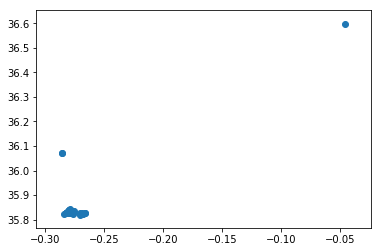

In [28]:
plt.scatter(latitude[cluster==cluster_unique[10]],longtitude[cluster==cluster_unique[10]])
plt.show()

In [29]:
index10=[i for i in range(len(cluster)) if cluster[i]==cluster_unique[10] and longtitude[i]>35.9]
cluster[index10]='NA'

In [30]:
delete_index=list()
N_missing=len(missing_farm_lat)

In [31]:
for i in range(N_cluster):
    lat_ci=latitude[cluster==cluster_unique[i]]
    long_ci=longtitude[cluster==cluster_unique[i]]
    min_lat_ci=min(lat_ci)
    max_lat_ci=max(lat_ci)
    min_long_ci=min(long_ci)
    max_long_ci=max(long_ci)
    index=[k for k in range(N_missing) if (missing_farm_lat[k]<max_lat_ci) and (missing_farm_lat[k]>min_lat_ci) and (missing_farm_long[k]>min_long_ci) and (missing_farm_long[k]<max_long_ci)]
    delete_index.extend(index)   

In [32]:
delete_list_unique=list(set(delete_index))
print(len(delete_list_unique))

In [36]:
for i in sorted(delete_list_unique, reverse=True):
    del missing_farm_lat[i]
    del missing_farm_long[i]
    del missing_farm_hold[i]

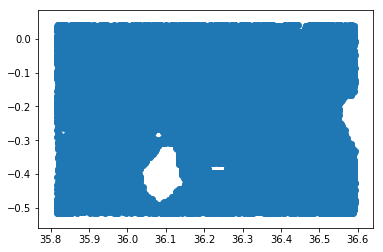

In [37]:
plt.scatter(missing_farm_long,missing_farm_lat)
#plt.scatter(longtitude,latitude)
plt.show()

In [45]:
df = pd.DataFrame({'lat':missing_farm_lat,'long':missing_farm_long,'cattle':missing_farm_hold})

In [46]:
print (df)

       cattle       lat       long
0           6  0.041087  35.819054
1           0  0.034595  35.821998
2          36  0.034986  35.822708
3           2  0.039033  35.818515
4           7  0.039823  35.817192
5          17  0.039945  35.820260
6           4  0.039550  35.820337
7           1  0.041387  35.822087
8           8  0.040411  35.822168
9           2  0.037195  35.821114
10         10  0.040617  35.819576
11         13  0.035962  35.823850
12         38  0.039489  35.820858
13          2  0.036310  35.828732
14          3  0.035216  35.829077
15          6  0.039816  35.828830
16          3  0.038744  35.831518
17         10  0.037150  35.825417
18          5  0.041347  35.830364
19         56  0.036810  35.829768
20          0  0.036322  35.827913
21          4  0.040365  35.827367
22          9  0.038332  35.830291
23          1  0.039424  35.825542
24          1  0.037894  35.825030
25          0  0.037325  35.826324
26         11  0.038174  35.825899
27          6  0.038

In [48]:
df.to_csv('imputed_farm_cattle', sep='\t', encoding='utf-8')

In [53]:
#readdata=pd.read_csv('imputed_farm_cattle', delim_whitespace=True)

In [54]:
#readdata

,cattle,lat,long
0,6,0.041087,35.819054
1,0,0.034595,35.821998
2,36,0.034986,35.822708
3,2,0.039033,35.818515
4,7,0.039823,35.817192
5,17,0.039945,35.820260
6,4,0.039550,35.820337
7,1,0.041387,35.822087
8,8,0.040411,35.822168
9,2,0.037195,35.821114
